In [17]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [37]:
# seaborn을 통해 타이타닉 데이터셋 로드
data = sns.load_dataset('titanic')

# 'age'의 결측값을 평균 대체.
data['age'].fillna(data['age'].mean(), inplace=True)

# 사용할 특성 선택
X = data[['fare', 'age']]
y = data['survived']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.33167904, -0.00282437],
       [-0.42640542,  0.09662937],
       [ 0.10261958,  0.09662937],
       ...,
       [-0.48162887, -0.00282437],
       [-0.28868112,  0.47888431],
       [ 0.14245584,  2.31370804]])

In [38]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6927374301675978
Confusion Matrix:
 [[104   6]
 [ 49  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79       110
           1       0.77      0.29      0.42        69

    accuracy                           0.69       179
   macro avg       0.72      0.62      0.61       179
weighted avg       0.71      0.69      0.65       179



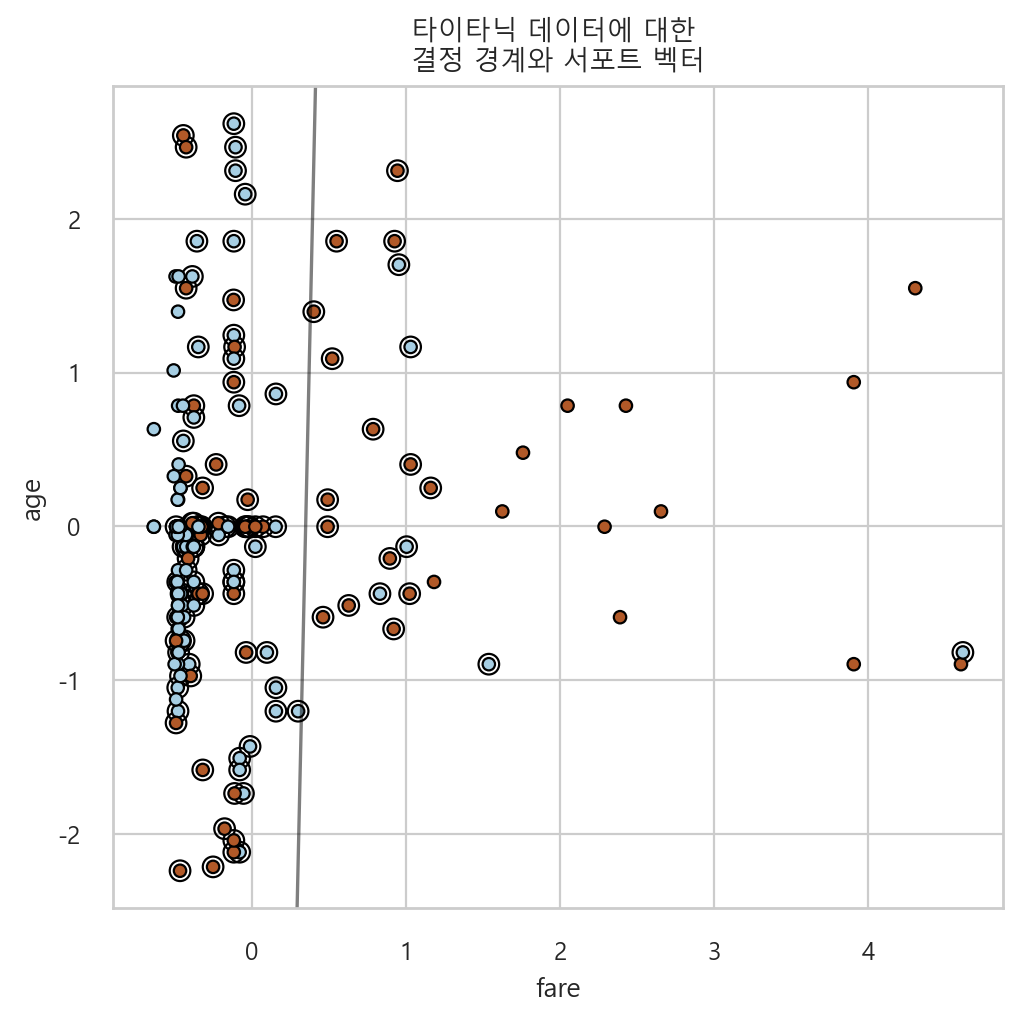

In [52]:
# SVM 모델 학습
svc_model = SVC(kernel='linear')
svc_model.fit(X_test, y_test)
support_vectors = svc_model.support_vectors_

fig, ax = plt.subplots(figsize=(5,5))
# 서포트 벡터와 결정 경계 시각화

# 서포트 벡터 시각화
ax.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=55,
            facecolors='none',
            edgecolors='k',
)
# 데이터 포인트 시각화
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', s=20)

# 결정 경계 시각화
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 결정 경계 그리기
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('타이타닉 데이터에 대한 \n결정 경계와 서포트 벡터')
plt.xlabel('fare')
plt.ylabel('age');